In [21]:
from chromatography import load_fsa_file
fsa = './raw_data/fsa/PA180404A/S1-20180328-230857_G02_SNaPshot50_POP7_E5_2018-04-06-16-40-43.fsa'
filename, record = load_fsa_file(fsa)

Workflow


Please see here: https://app.diagrams.net/#G1HzMMyRkVhr8Y_M1wMmXwmZagIEpak1Bb

In [97]:
from scipy.signal import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def extract_raw_intensity(data):
    
    channels = ['DATA1', 'DATA2', 'DATA3', 'DATA4', 'DATA105']

    # DATA105 reference channel (LIZ120)

    intensity = {}

    for channel in channels:
        intensity[channel] = data[channel]
    
    return intensity



def generate_range(lists):
    range = []
    for i,_ in enumerate(lists):
        # print(i)
        if i < len(lists)-1:
            range.append((lists[i], lists[i+1]))

    return range



def liz120_info(ref_size =[15, 20, 25, 35, 50, 62, 80, 110, 120]):

    return ref_size, generate_range(ref_size)



def finding_peaks(intensity, min_width=1, min_height=500, min_prominence = 50):
    
    peaks, heights = find_peaks(intensity, height=min_height)
    heights = heights['peak_heights']

    if min_prominence:
        prominence = peak_prominences(intensity, peaks)
        conditions =  np.where(prominence[0] > min_prominence)
        peaks = peaks[conditions]
        heights = heights[conditions]
    
    if min_width:
        width = peak_widths(intensity, peaks)
        conditions = np.where(width[0] > min_width)
        peaks = peaks[conditions]
        heights = heights[conditions]

    return peaks, heights


def union(*list):
    final_list = []
    for l in list:
        final_list = final_list + l
        # print(l)
    return final_list


def generate_base_size_from_ref(ref_intensity, range=(0,200)):
    
    size, ranges = liz120_info()
    peaks, peak_heights = finding_peaks(ref_intensity, min_height=800)
    total_points = np.max(peaks) - np.min(peaks)
    size_range = np.max(size) - np.min(size)

    # print(peaks, total_points, size_range, size)
    
    # average points is total point divide to size range
    avarage_points = total_points/size_range

    # simulate first base range and last base range
    # since we need to extend from ref size to both size includes begin and end
    # default range from 0, 200 bp

    first_range = np.min(size) - range[0]
    
    first_range_points = int(round(avarage_points * first_range))
    first_range_bases = np.linspace(range[0], np.min(size), first_range_points).tolist()

    last_range = range[1] - np.max(size) 
    last_range_points = int(round(avarage_points * last_range))
    last_range_bases = np.linspace(np.max(size), range[1], last_range_points).tolist()

    # print(first_range, last_range, first_range_points, last_range_points)
    # simulate the reference base
    peak_ranges = generate_range(peaks)

    # expected that number of range from references and ranges form detected peaks are identical
    if len(ranges) != len(peak_ranges):
        raise ValueError('Reference range and detected peak range are difference!')

    base_ref_range = []

    for ref, peak in zip(ranges, peak_ranges):

        singe_range = np.linspace(ref[0], ref[1], peak[1] - peak[0]+ 1)
        base_ref_range = base_ref_range + singe_range.tolist()
    
    # gathering all base range 
    full_base = first_range_bases + base_ref_range + last_range_bases
    full_base = list(np.round(np.array(full_base), 2))
    data_points_index = (np.min(peaks) - first_range_points + 1, np.max(peaks) + last_range_points)

    # create data

    data = {}
    data['reference_size'] = size
    data['full_base'] = np.sort(np.unique(np.array(full_base)))
    data['intensity'] = np.array(ref_intensity[data_points_index[0]:data_points_index[1]])
    data['point_index'] = data_points_index
    data['detected_peaks'] = peaks
    data['peak_heights'] = peak_heights


    return data

In [170]:
allele_data.get('CYP2D6_14')

{1: {'type': 'widtype', 'base': 'G', 'range': (25, 35)},
 2: {'type': 'mutant', 'base': 'A', 'range': (27, 36)}}

In [66]:
allele_data = {
    'CYP2D6_14': { 1: {    'type': 'widtype',
                            'base': 'G',
                            'range': (25,35)
                        },
                    2: {    'type': 'mutant',
                            'base': 'A',
                            'range': (27,36)
                        } 
              },
    'CYP2D6_10B': { 1: {    'type': 'widtype',
                            'base': 'C',
                            'range': (28,38),
                        },
                    2: {    'type': 'mutant',
                            'base': 'T',
                            'range': (31,37),
                        } 
            },
    'CYP2D6_49': { 1: {    'type': 'widtype',
                            'base': 'T',
                            'range': (37,44),
                        },
                    2: {    'type': 'mutant',
                            'base': 'A',
                            'range': (38,45),
                        } 
            },
    'CYP2D6_21': { 1: {    'type': 'widtype',
                            'base': 'G',
                            'range': (41,45)
                        },
                    2: {    'type': 'mutant',
                            'base': 'C',
                            'range': (42,49),
                        } 
            },
    'CYP2D6_41': { 1: {    'type': 'widtype',
                            'base': 'G',
                            'range': (45,50),
                        },
                    2: {    'type': 'mutant',
                            'base': 'A',
                            'range': (47,50),
                        } 
              },
    'CYP2D6_52': { 1: {    'type': 'widtype',
                            'base': 'G',
                            'range': (50,55),
                        },
                    2: {    'type': 'mutant',
                            'base': 'A',
                            'range': (50,55),
                        } 
            },
    'CYP2D6_18': { 1: {    'type': 'widtype',
                            'base': 'G',
                            'range': (53,57),
                        },
                    2: {    'type': 'mutant',
                            'base': 'T',
                            'range': (55,59),
                        } 
            },
    'CYP2D6_2': { 1: {    'type': 'widtype',
                            'base': 'C',
                            'range': (57,62),
                        },
                    2: {    'type': 'mutant',
                            'base': 'T',
                            'range': (59,63),
                        } 
            },
    'CYP2D6_60': { 1: {    'type': 'widtype',
                            'base': 'G',
                            'range': (63,68),
                        },
                    2: {    'type': 'mutant',
                            'base': 'A',
                            'range': (65,68),
                        } 
            },
    'CYP2D6_5': { 1: {    'type': 'widtype',
                            'base': 'A',
                            'range': (68,73),
                        },
                    2: {    'type': 'mutant',
                            'base': 'G',
                            'range': (68,72),
                        } 
            },
}


forward_color_map = {
    'A': 'green',
    'T': 'red',
    'C': 'black',
    'G': 'blue'
}


reverse_color_map = {
    'A': 'red',
    'T': 'green',
    'C': 'blue',
    'G': 'black'
}


reverse_map = {
    'A':'T',
    'T':'A',
    'G':'C',
    'C':'G'
}

data_chanel_map = {
    'G':'DATA1',
    'A':'DATA2',
    'C':'DATA3',
    'T':'DATA4'
}

In [3]:
isForward = [True,True,False,True,True,False,True,False,False,False]

raw = record.annotations['abif_raw']
i_ref = raw['DATA105']
ref_data = generate_base_size_from_ref(i_ref)

ref_point_index = ref_data['point_index']
full_base = ref_data['full_base']

# get channel by direction
def get_intensity_by_chanel(chanel, min, max):
    intensity = np.array(raw[chanel][ref_point_index[0]:ref_point_index[1]])
    return intensity[(full_base >= min) & (full_base <= max)]

# get interested basepair range from bin
def get_interested_bin(min, max):
    return full_base[(full_base >= min) & (full_base <= max)]


#
def get_marker_range(allele_data):
    return allele_data.get('range')[0], allele_data.get('range')[1]


def get_base_color(base, isForward):
    
    return forward_color_map.get(base) if isForward else reverse_color_map.get(base)
    

def get_data_chanel(base, isForward=True):
    return data_chanel_map.get(base) if isForward else data_chanel_map.get(reverse_map.get(base))

def finding_peak_by_marker(marker_data, direction):
    results = {}
    for i, allele in enumerate(marker_data):
        allele_called = {}
        allele_data = marker_data.get(allele)
        min, max = get_marker_range(allele_data)
        basepairs = get_interested_bin(min, max)
        base = allele_data.get('base')
        chanel = get_data_chanel(base, direction)
        intensity = get_intensity_by_chanel(chanel, min, max)
        peak, height = finding_peaks(intensity)
        color = get_base_color(base, direction)

        # update called status
        if len(peak) == 1:
            call_status = 'called'
        elif len(peak) > 1:
            call_status = 'warning'
        else:
            call_status = 'nocalled'

        allele_called = {
            'base': base,
            'chanel': chanel,
            'peak': peak,
            'height': height,
            'peak_location': basepairs[peak],
            'color': color,
            'type':allele_data.get('type'), 
            'status': call_status
        }
        results[i+1] = allele_called

    return results



# print(ref_point_index)

def call_by_fsa():
    results = {}
    for marker, direction in zip(allele_data, isForward):
        marker_data = allele_data.get(marker)

        tmp = finding_peak_by_marker(marker_data, direction)
        results[marker] = tmp
    
    return results


NameError: name 'record' is not defined

In [51]:
def get_called_genotype(results):
    
    df =  pd.DataFrame()
    for k, v in results.items():
        tmp = pd.DataFrame.from_dict(v, orient='index')
        tmp['marker'] = k
        df = pd.concat([df, tmp])
    return df


In [93]:
def generate_intensity(size, height):

    '''Generate intensity base on height of each allele'''
    
    # generate width based on height

    range = 2.5 if height < 10000 else 2.7
        
    width = np.arange(-1*range,range,0.01)

    intensity = height*np.exp(-15*np.log(1+(width**2)/10))

    # set 1 first and last intensity = 0 to make sure all all k
    intensity[0] = 0
    intensity[-1] = 0
    
    return width, intensity

def plot(data, xlim =(20,80), 
         figsize =(15,5),
         dpi = 200,
         alpha = 0.8,
         marker_labels=True,
         ex_height = 0.2,
         ex_annotation = 0.05):
    
    data = data.sort_values('height')
    max_height = np.max(data.height)

    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)

    ax.set_xlim(*xlim)
    ax.set_ylim(0, max_height +  max_height * ex_height)
    ax.grid(linestyle='--', alpha = 0.3, color ='gray', linewidth = 0.3)

    for idx, row in data.iterrows():

        width, y = generate_intensity(row.peak_location, row.height)

        x = width + row.peak_location
        
        ax.fill(x, y, color=row.color, alpha=alpha)

    # process marker information
    props = dict(boxstyle='round', facecolor='#f8f9fa', alpha=0.5)
    if marker_labels:
        tmp = data.groupby(['marker'], as_index=False).agg({'peak_location':np.average, 'height':np.max})

        for _, row in tmp.iterrows():
            ax.text(row.peak_location,
                    row.height + max_height * ex_annotation,
                    row.marker, 
                    ha='center',
                    fontsize = 11,
                    bbox=props)

    plt.tight_layout()
    plt.show()

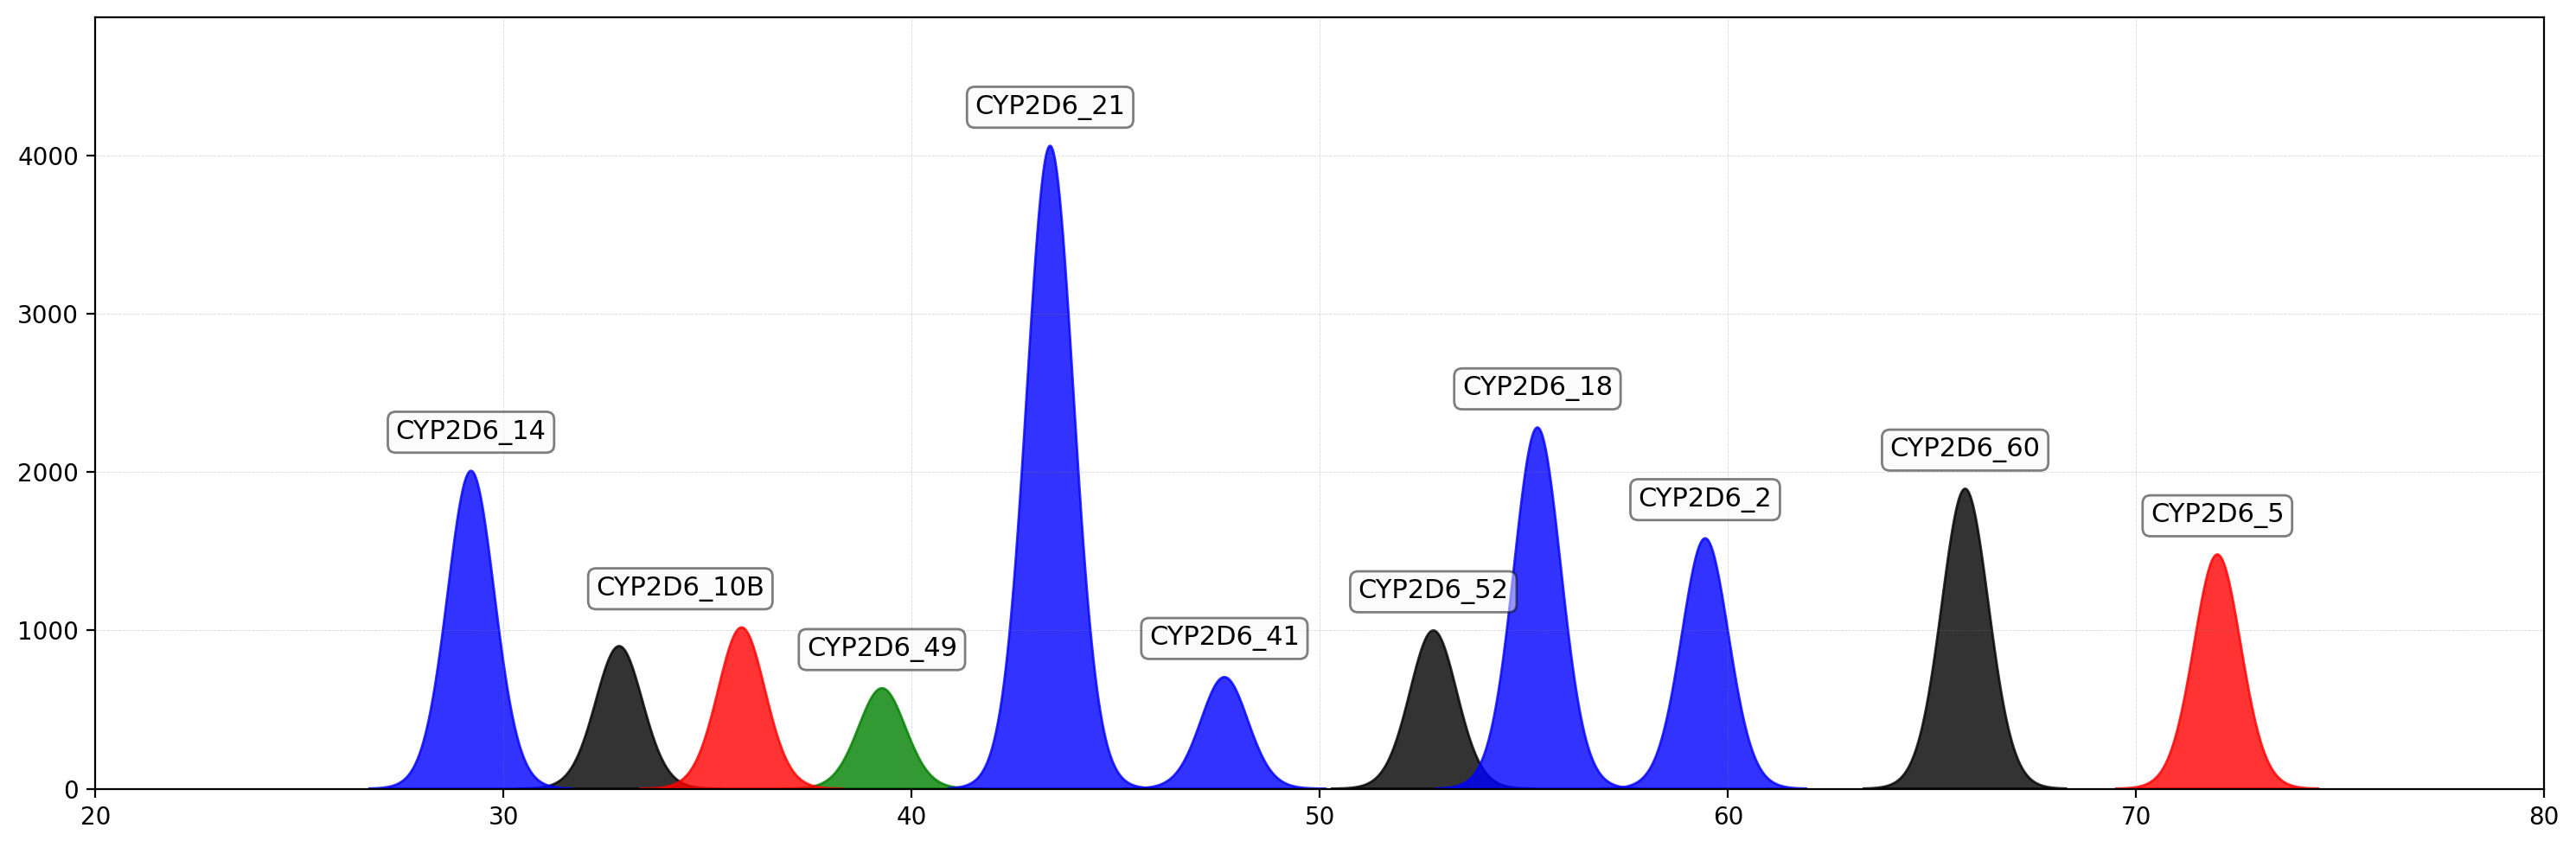

In [94]:
fsa = './raw_data/fsa/PA180404A/S1-20180328-230857_G02_SNaPshot50_POP7_E5_2018-04-06-16-40-43.fsa'
filename, record = load_fsa_file(fsa)

raw = record.annotations['abif_raw']
i_ref = raw['DATA105']
ref_data = generate_base_size_from_ref(i_ref)

ref_point_index = ref_data['point_index']
full_base = ref_data['full_base']


results = call_by_fsa()
data = get_called_genotype(results)
data = data[data.status == 'called']

plot(data, marker_labels=True)

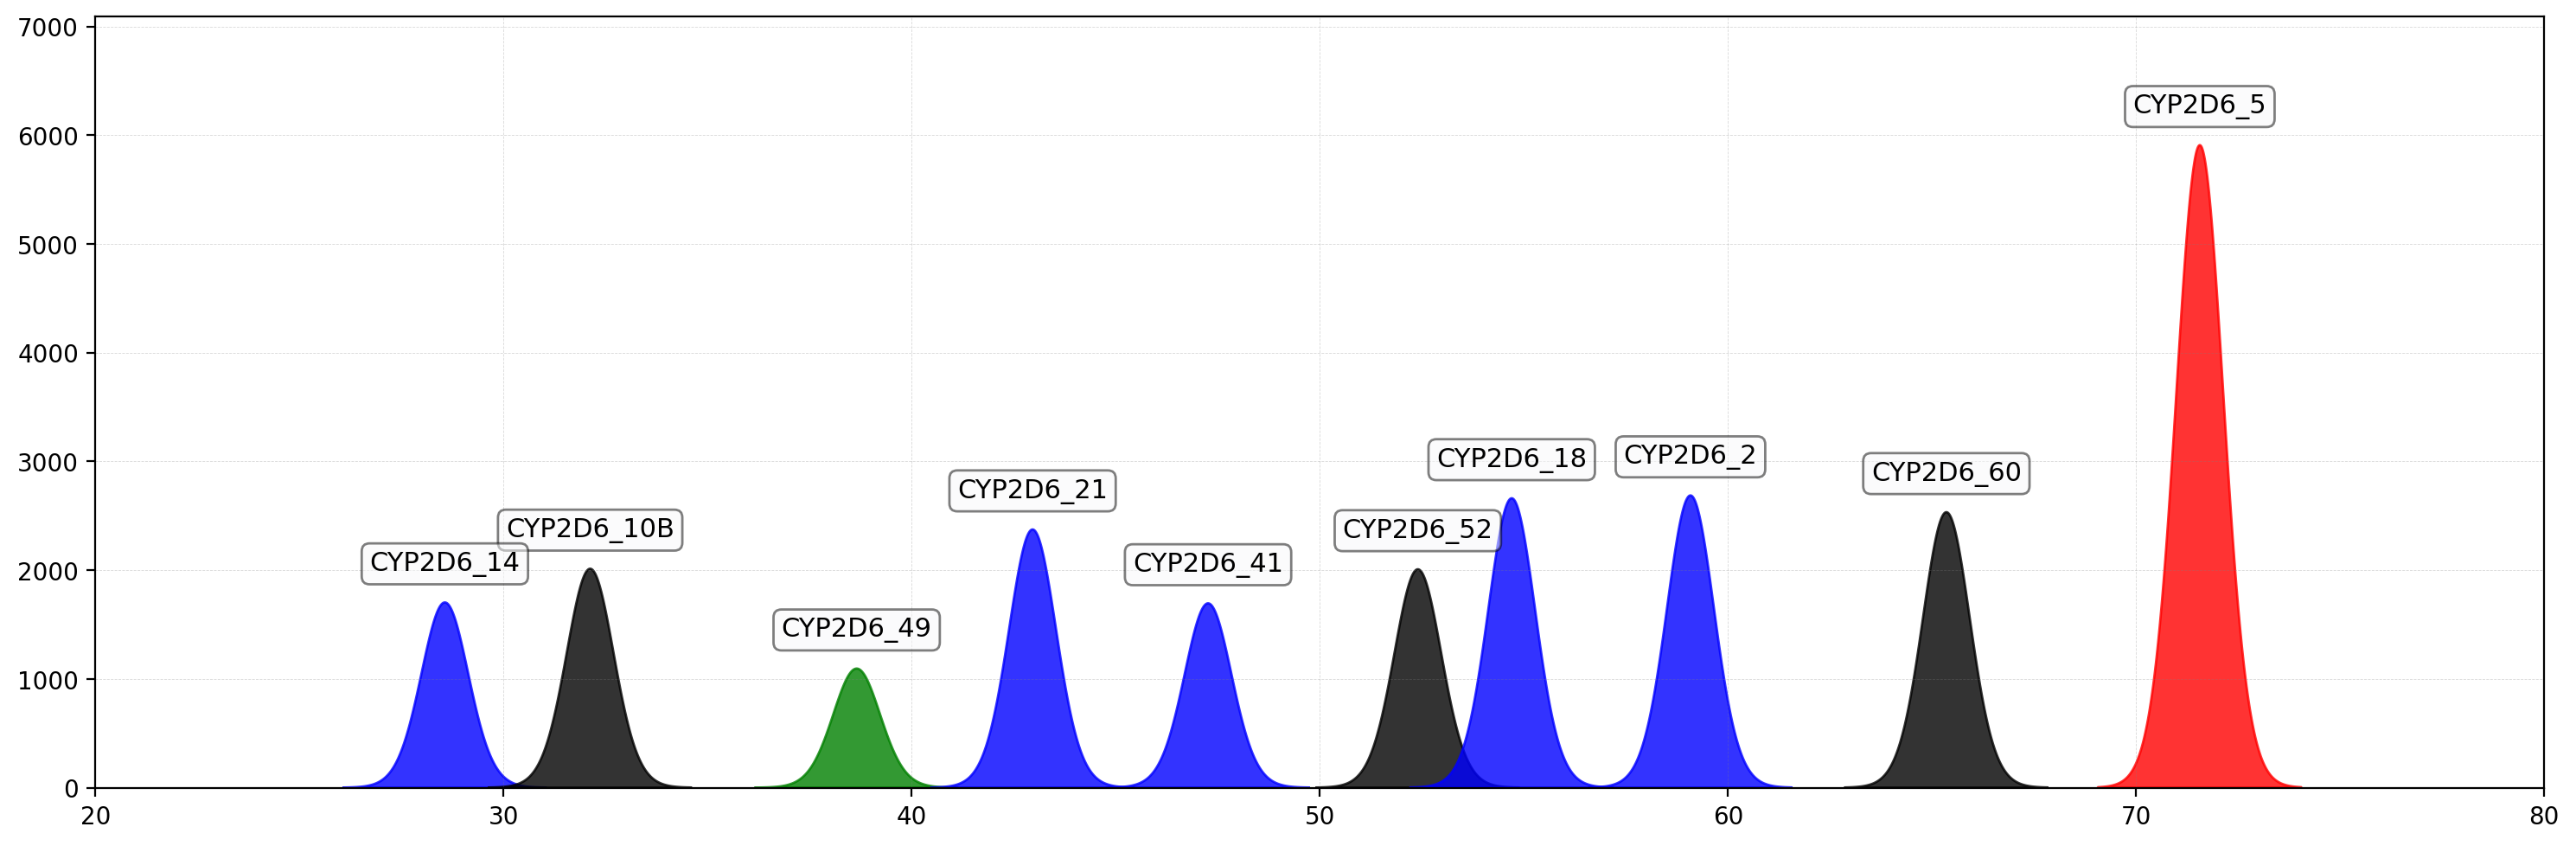

In [95]:
fsa = './raw_data/fsa/PA180503A/S1-20180430-660029_E01_SNaPshot50_POP7_E5_2018-05-08-16-40-43.fsa'
filename, record = load_fsa_file(fsa)

raw = record.annotations['abif_raw']
i_ref = raw['DATA105']
ref_data = generate_base_size_from_ref(i_ref)

ref_point_index = ref_data['point_index']
full_base = ref_data['full_base']


results = call_by_fsa()
data = get_called_genotype(results)
data = data[data.status == 'called']

plot(data, marker_labels=True)

,base,chanel,peak,height,peak_location,color,type,status,marker
1,G,DATA1,[26],[891.0],[28.33],blue,widtype,called,CYP2D6_14
2,T,DATA4,[27],[542.0],[34.49],red,mutant,called,CYP2D6_10B
1,G,DATA1,[18],[885.0],[43.15],blue,widtype,called,CYP2D6_21
1,G,DATA1,[11],[761.0],[54.17],blue,widtype,called,CYP2D6_18
1,G,DATA3,[20],[832.0],[65.32],black,widtype,called,CYP2D6_60


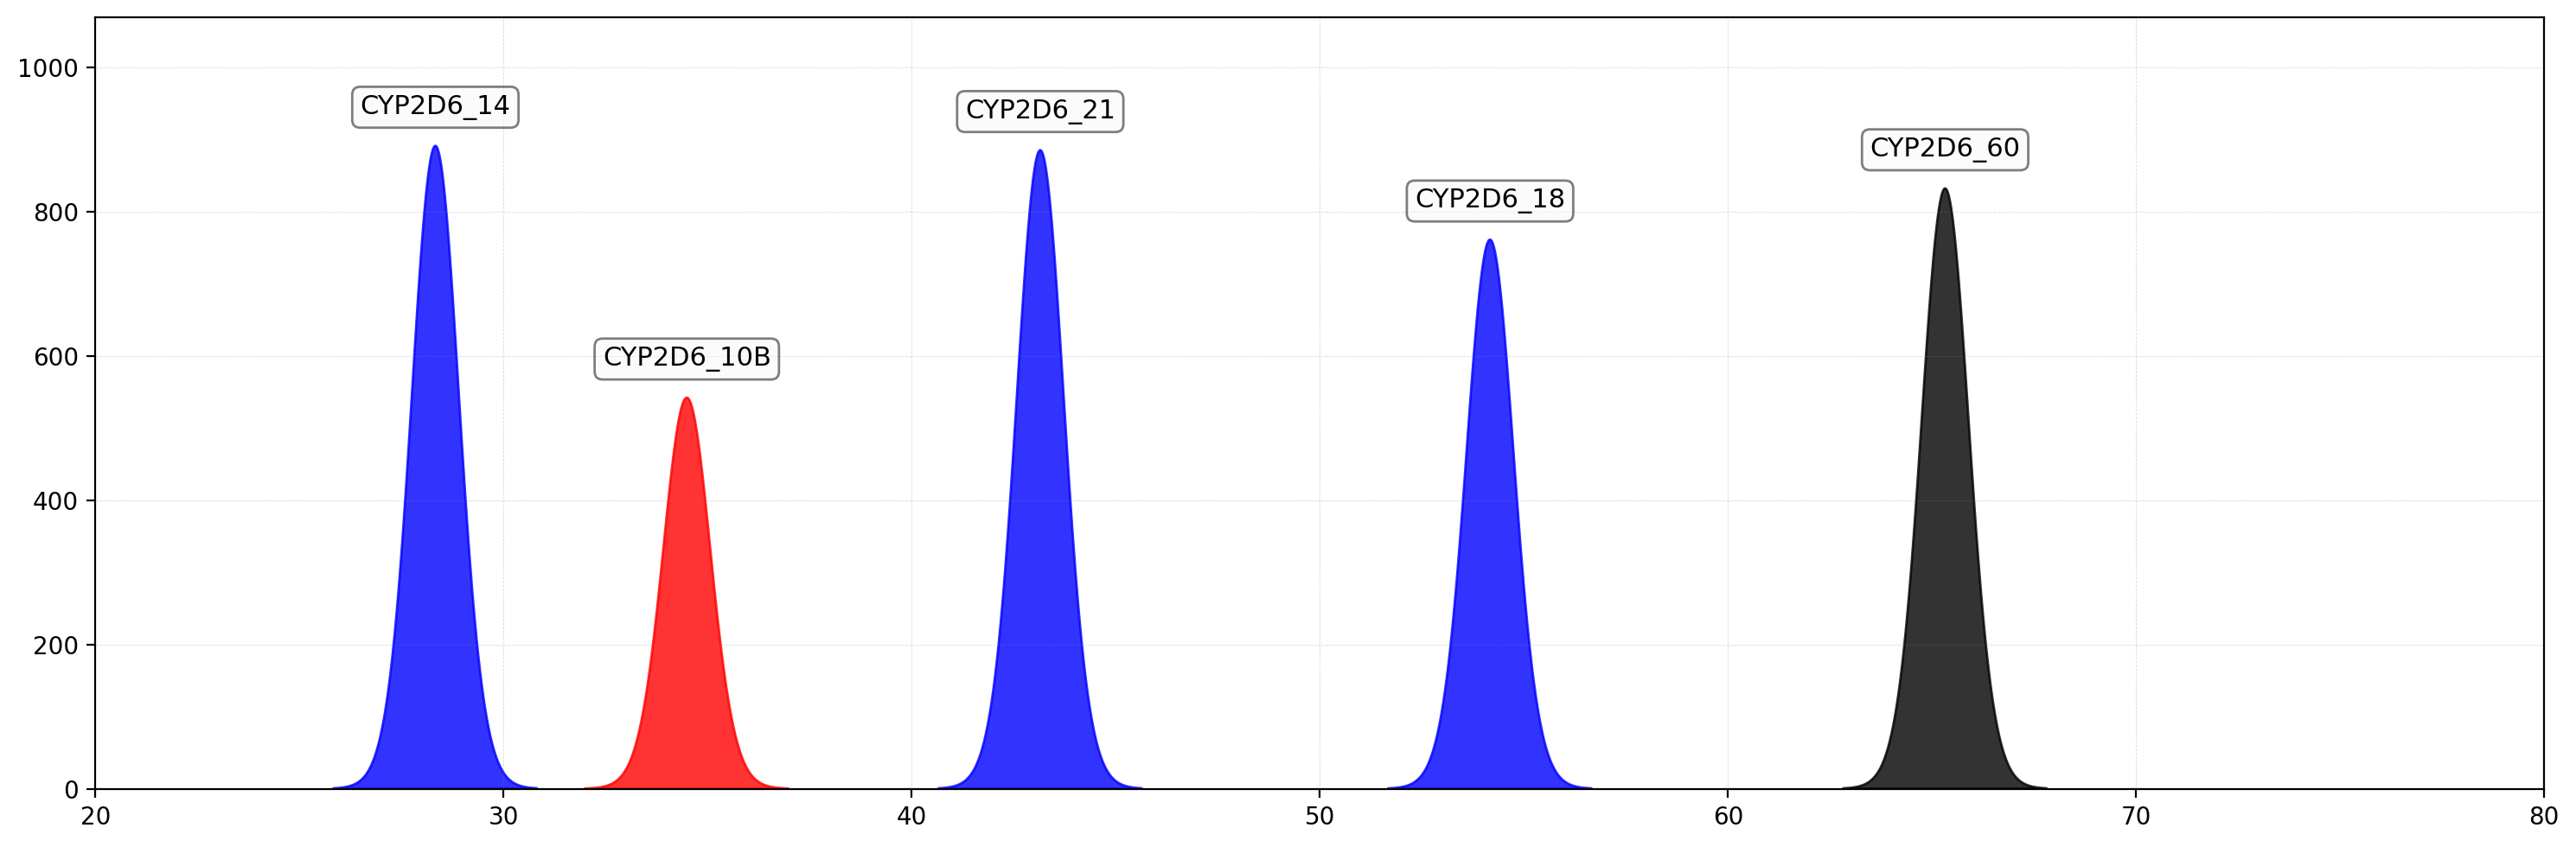

In [96]:
fsa = './raw_data/fsa/PA181114A/S1-20181106-730829_A10_SNaPshot50_POP7_E5_2018-11-23-16-40-43.fsa'
filename, record = load_fsa_file(fsa)

raw = record.annotations['abif_raw']
i_ref = raw['DATA105']
ref_data = generate_base_size_from_ref(i_ref)

ref_point_index = ref_data['point_index']
full_base = ref_data['full_base']


results = call_by_fsa()
data = get_called_genotype(results)
data = data[data.status == 'called']

display(data)

plot(data, marker_labels=True)

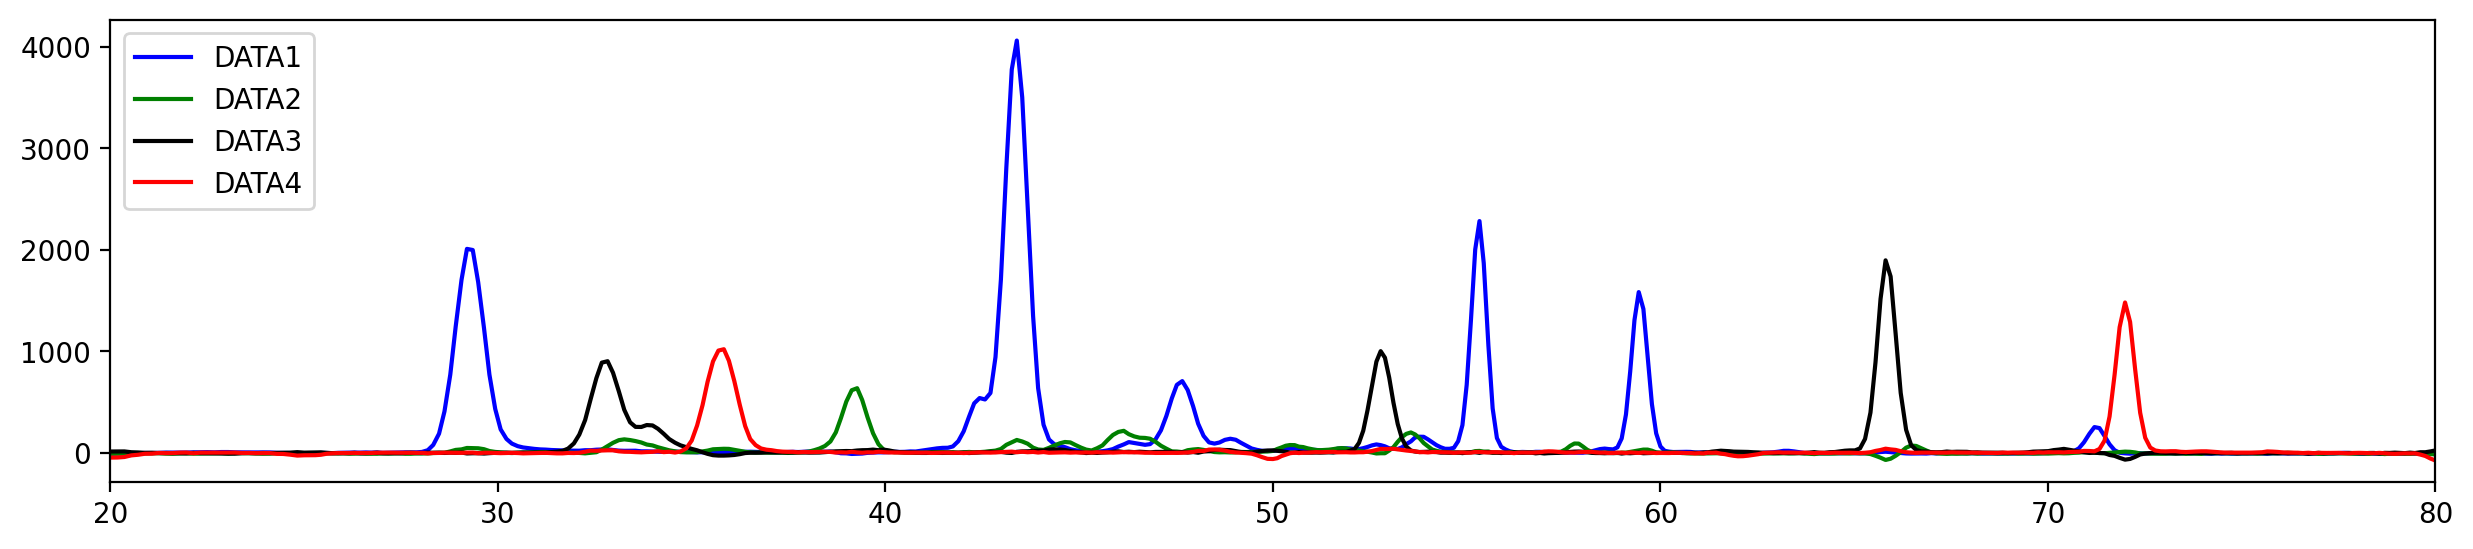

In [47]:
# ploting
fig, ax = plt.subplots(1,1, figsize =(15,3), dpi = 200)
ax.set_xlim(20, 80)
for base in data_chanel_map:
    chanel = data_chanel_map.get(base)
    p1, p2 = ref_point_index[0], ref_point_index[1]
    intensity = raw[chanel][p1:p2]
    color = forward_color_map.get(base)

    ax.plot(full_base, intensity, color = color, label = chanel)
plt.legend(loc='upper left')
plt.show()

In [46]:
marker = ['CYP2D6_001', 'CYP2D6_002']
allele1 = [(25,35), (31,33.57)]
allele2 = [(27,36), (34, 36.36)]
strand = ['F', 'R']

# DATA1: T
# DATA2: G
# DATA3: A

# marker_data['markers'] = markers
channels = ['DATA1', 'DATA2', 'DATA3', 'DATA4']
ref_point_index = ref_data['point_index']
full_base = ref_data['full_base']

for i, m in enumerate(marker):
    a1_min, a1_max = allele1[i]
    a2_min, a2_max = allele2[i]
    base_a1 = full_base[(full_base > a1_min) & (full_base < a1_max)]
    base_a2 = full_base[(full_base > a2_min) & (full_base < a2_max)]

    for channel in channels:
        ex_intensity = np.array(raw[channel][ref_point_index[0]:ref_point_index[1]])
        inten_1 = ex_intensity[(full_base > a1_min) & (full_base < a1_max)]
        inten_2 = ex_intensity[(full_base > a2_min) & (full_base < a2_max)]
        p1,h1 = finding_peaks(inten_1)
        p2,h2 = finding_peaks(inten_2)

        print(f'marker:{m} | data: {channel} | allele1: location: {base_a1[p1]} height {h1} | allele2: location: {base_a2[p2]} height {h2}')


marker:CYP2D6_001 | data: DATA1 | allele1: location: [29.2] height [2008.] | allele2: location: [29.2] height [2008.]
marker:CYP2D6_001 | data: DATA2 | allele1: location: [] height [] | allele2: location: [] height []
marker:CYP2D6_001 | data: DATA3 | allele1: location: [32.83] height [901.] | allele2: location: [32.83] height [901.]
marker:CYP2D6_001 | data: DATA4 | allele1: location: [] height [] | allele2: location: [35.83] height [1019.]
marker:CYP2D6_002 | data: DATA1 | allele1: location: [] height [] | allele2: location: [] height []
marker:CYP2D6_002 | data: DATA2 | allele1: location: [] height [] | allele2: location: [] height []
marker:CYP2D6_002 | data: DATA3 | allele1: location: [32.83] height [901.] | allele2: location: [] height []
marker:CYP2D6_002 | data: DATA4 | allele1: location: [] height [] | allele2: location: [35.83] height [1019.]


In [ ]:
base = full_base[(full_base > 20) & (full_base < 30)]
inten = full_intensity[(full_base > 20) & (full_base < 30)]

In [ ]:
fsa = './raw_data/fsa/PA180404A/S1-20180328-230857_G02_SNaPshot50_POP7_E5_2018-04-06-16-40-43.fsa'

filename, record = load_fsa_file(fsa)

raw = record.annotations['abif_raw']

fig, ax = plt.subplots(figsize =(15,5))
channels = ['DATA1', 'DATA2', 'DATA3', 'DATA4']


ax.set_xlim(1100, 1600)
ax.set_ylim(0, 4500)

ax.plot(raw['DATA1'], color = 'blue')
ax.plot(raw['DATA2'], color = 'green')
ax.plot(raw['DATA3'], color = 'black')
ax.plot(raw['DATA4'], color = 'red')

# for data in channels:
#     intensity =  raw[data]
#     ax.plot(intensity)


In [15]:
from Bio import SeqIO
from sklearn.metrics import r2_score
from scipy.signal import find_peaks, peak_prominences, peak_widths
import numpy as np
from matplotlib import pyplot as plt



def loadFSA(aFSA):
    """Load FSA file
    Args:
        aFSA (str): A path to a FSA file.

    Returns:
        SeqIO: A data loaded from FSA file.
    """

    return(SeqIO.read(aFSA, 'abi'))



def generateReferenceRange(reference):
    """Generate all range from reference data

    Args:
        reference (list, required): A list contain all bp locations of refernces.
                                    Defaults to [15, 20, 25, 35, 50, 62, 80, 110, 120].

    Returns:
        list:   The list contant all generated range of the references
                Example: [(15, 20), (20,25)]
    """

    referenceRange = []
    
    for i,_ in enumerate(reference):
        if i < len(reference)-1:
            referenceRange.append((reference[i], reference[i+1]))

    return referenceRange



def getRawData(FSA, chanel):
    """Extract raw intensity by chanel.

    Args:
        FSA (class): A class load FSA file.
        chanel (str): An interested intensity chanel.

    Returns:
        Tuple: A tuple about a chanel intensity data.
    """
    return FSA.rawdata[chanel]



class FSA:
    def __init__(self, aFSA) -> None:
        self.data = SeqIO.read(aFSA, 'abi')
        self.name = self.data.name
        self.id = self.data.id
        self.description = self.data.description
        self.rawdata = self.data.annotations['abif_raw']

    def panel(self):
        """Extract panel from fsa name. The first element of the name was consider as the panel.

        Returns:
            str: name of the panel
        """
        return self.name.split('-')[0]
    
    @property
    def reference_intensity(self):
        """Extract reference intensity, in the fsa raw data format, DATA105 is defined for reference intensity chanel.

        Returns:
            tupe: A tupe of all reference intensity data.
        """
        return self.rawdata['DATA105']
    
    @property
    def chanel_size(self):
        """Return chanel size, it will be used for generate number of points and make basepairs prediction.

        Returns:
            int: Length of the intensity chanel.
        """
        return len(self.reference_intensity)

    def extract_intensity(self, chanel, range=None):
        """Extract the intensity by a specific chanel.
           In the FSA file, there 4 chanels (DATA1, DATA2, DATA3, DATA4) following 4 nucleotides (ATCG)

        Args:
            chanel (str): chanel name for [DATA1, DATA2, DATA3, DATA4]
            range (tupe, optional): A tupe defines an intersted range for extract. It was resulted in by `get_index_by_base_range` function. Defaults to None.

        Returns:
            tupe: intensity of the selected chanel
        """
        if range:
            return self.rawdata[chanel][range[0]:range[1]]
        else:
            return self.rawdata[chanel]

class Reference:
    def __init__(self, aRef) -> None:
        self.size = aRef
        self.range = generateReferenceRange(self.size)
        self.length = len(self.size)



def finding_peaks(intensity, min_width=None, min_height=500, min_prominence = None):
    """Finding Peaks based on intensity data

    Args:
        intensity (tupe, required): intensity data from a chanel
        min_width (int, optional): threshold minimum width of the peaks. Defaults to None. Reference value: 1
        min_height (int, optional): threshold minimum height of the peaks. Defaults to 500.
        min_prominence (int, optional): threshold minimum depth of the peaks. Defaults to None. Reference value 50

    Returns:
        peaks: a list of detected peaks
        heights: a list of corresponding detected peaks
    """
    
    peaks, heights = find_peaks(intensity, height=min_height)
    heights = heights['peak_heights']

    if min_prominence:
        prominence = peak_prominences(intensity, peaks)
        conditions =  np.where(prominence[0] >= min_prominence)
        peaks = peaks[conditions]
        heights = heights[conditions]
    
    if min_width:
        width = peak_widths(intensity, peaks)
        conditions = np.where(width[0] >= min_width)
        peaks = peaks[conditions]
        heights = heights[conditions]

    return peaks, heights


class LeastSquared:
    
    # reference sizing https://www2.unbc.ca/sites/default/files/sections/genetics/microsat.pdf
    # https://apps.thermofisher.com/apps/peak-scanner/help/GUID-CEE18138-6788-48FA-8E08-4CE939F4B9D8.html
    
    def __init__(self, peak, reference_size, degree = 3):
        self.peak = peak
        self.reference_size = reference_size
        self.degree = degree
        self.popt = np.polyfit(self.peak, self.reference_size, self.degree)
        self.ref_predicted = np.polyval(self.popt, self.peak)


    @property
    def r2_score(self):
        return r2_score(self.reference_size, self.ref_predicted)

    def val_plot(self, title):
        """Plot a validation figure from reference and predicted result.

        Args:
            title (str): Title of the figure, it can be a fsa name.
        """
        _min = np.min(self.peak) - 100
        _max = np.max(self.peak) + 100
        xn = range(_min, _max +1)
        yn = np.polyval(self.popt, xn)
        
        fig, ax = plt.subplots(figsize=(5,3), dpi = 150)
        alpha = 0.8
        ax.plot(xn, yn, color = 'blue', label = 'Predicted', alpha = alpha)
        ax.plot(self.peak, self.reference_size, 'or', label = 'Reference', alpha =alpha)
        ax.set_xlabel('Points')
        ax.set_ylabel('Basepairs')
        ax.set_title(title, fontsize = 8)
        fig.text(0.2, 0.80, f'$R^{2} = {str(self.r2_score)}$')
        plt.legend(loc='lower right')
        plt.tight_layout()
        plt.show()

    def predict(self, x):
        """Predict basepairs based on range of points

        Args:
            x (list): A list of points want to be predicted by built model

        Returns:
            np.array: An array includes predicted basepairs.
        """
        return np.polyval(self.popt, x)



class Allele:
    def __init__(self, base:str, basetype:str, is_forward:bool, min_bin:int, max_bin:int, min_height:int = 500) -> None:
        """Create allele class

        Args:
            base (str): tested nucleotide [A,T,C,G]
            basetype (str): whether base is wildtype or mutant
            min_bin (int): min bin set for peak detection
            max_bin (int): max bin set for peak detection
            min_height (int, optional): min height for peak detection. Defaults to 500.
        """
        self.base = base
        self.basetype = basetype
        self.min_bin = min_bin
        self.max_bin = max_bin
        self.min_height = min_height
        self.is_forward = is_forward
    
    @property
    def color(self):
        """Return color based on marker's direction and target base

        Returns:
            str: color
        """
        return forward_color.get(self.base) if self.is_forward else reverse_color.get(self.base)

    @property
    def data_chanel(self):
        """Return data chanel based on marker's direction and target base

        Returns:
            _type_: _description_
        """
        return data_chanel_map.get(self.base) if self.is_forward else data_chanel_map.get(reverse_map.get(self.base))

    # def add_call_status(self, call_status):
    #     self.is_called = call_status


forward_color = {
    'Ref': 'orange',
    'A': 'green',
    'T': 'red',
    'C': 'black',
    'G': 'blue'

    }

reverse_color = {
    'Ref': 'orange',
    'A': 'red',
    'T': 'green',
    'C': 'blue',
    'G': 'black'
}

data_chanel_map = {
    'Ref': 'DATA105',
    'G':'DATA1',
    'A':'DATA2',
    'C':'DATA3',
    'T':'DATA4'
}


reverse_map = {
    'A':'T',
    'T':'A',
    'G':'C',
    'C':'G'
}

class Marker:

    def __init__(self, gene:str, marker_name: str, panel:str, is_forward:bool, alleles = []) -> None:
        """Creat a marker class

        Args:
            gene (str): gene name
            marker_name (str): marker name
            panel (str): panel name, it should be identical with chanel detected from FSA file
            is_forward (bool): direction of this marker, True mean forward, False mean reverse.
            alleles (list, optional): Allele class information. Defaults to [].
        """
        self.gene = gene
        self.marker_name = marker_name
        self.is_forward = is_forward
        self.alleles = alleles
        self.panel = panel
        # self.num_alleles = 0
    
    def add_allele(self, allele):
        allele.is_forward = self.is_forward
        self.alleles.append(allele)
    
    @property
    def num_alleles(self):
        return len(self.alleles)


def get_index_by_base_range(base_pred, ranges=(0,200)):
    """Get index of orginal intensity based on intested basepairs.


    Args:
        base_pred (_type_): _description_
        ranges (tuple, optional): _description_. Defaults to (0,200).

    Returns:
        _type_: _description_
    """
    min_index = np.where(base_pred >= ranges[0])[0][0]
    max_index = np.where(base_pred >= ranges[1])[0][0]

    return (min_index, max_index)


def plot_raw_intensity(fsa,min_index, max_index, select_base, base_range=(20,80)):
    fig, ax = plt.subplots(1,1, figsize =(12,3), dpi = 200)
    ax.set_xlim(*base_range)
    for base in data_chanel_map:
        chanel = data_chanel_map.get(base)
        intensity = fsa.extract_intensity(chanel, (min_index, max_index))
        color = forward_color.get(base)
        alpha = 0.6 if base == 'Ref' else 1

        ax.plot(select_base, intensity, color = color, label = chanel, alpha = alpha)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()


def generate_markers(peak_table):

    maker_list = []
    for _,row in peak_table.iterrows():
        m = Marker(row.gene, row.marker, row.panel, row.is_forward, [])
        a1 = Allele(row.w_base, 'wildtype', row.is_forward, row.w_min, row.w_max)
        # a1.set_color(row.is_forward)
        a2 = Allele(row.m_base, 'mutant', row.is_forward, row.m_min, row.m_max)
        # a2.set_color(row.is_forward)
        m.add_allele(a1)
        m.add_allele(a2)
        maker_list.append(m)

    return maker_list


def finding_peak_by_markers(markers, fsa, panel, select_base, index_range):
    for j, marker in enumerate(markers):
        if marker.panel == panel:
            for i,allele in enumerate(marker.alleles):
                intensity = fsa.extract_intensity(allele.data_chanel, (index_range[0],index_range[1]))
                _min = np.where(select_base >= allele.min_bin)[0][0]
                _max = np.where(select_base <= allele.max_bin)[0][-1]
                i_base = select_base[_min:_max]
                i_intensity = intensity[_min:_max]
                peak,height = finding_peaks(i_intensity, min_height= allele.min_height, min_width=0.7, min_prominence=30)

                if peak.size == 1:
                    allele.is_detected = True
                    allele.peak = peak
                    allele.peak_loc = i_base[peak]
                    allele.height = height
                    allele.status = 'ok'
                    allele.message = ''
                elif peak.size > 1:
                    allele.is_detected = True
                    allele.peak = peak
                    allele.peak_loc = i_base[peak]
                    allele.height = height
                    allele.status = 'warning'
                    allele.message = 'More than 1 peaks detected!'
                else:
                    allele.is_detected = False
                    allele.peak = ''
                    allele.peak_loc = ''
                    allele.height = ''
                    allele.status = ''
                    allele.message = 'Peak(s) could not be detected. Please check peak range if required!'
                
                # print('append allele', marker.marker_name)
                marker.alleles[i] = allele

            markers[j] = marker

    # update genotype 
    update_marker_genotype(markers, panel)

def update_marker_genotype(markers, panel):
    for i, marker in enumerate(markers):
        if marker.panel == panel:
            genotype = ''
            phenotype = ''
            is_called = False
            basetype = []
            called_base = []
            for j, allele in enumerate(marker.alleles):
                if allele.status == 'ok':
                    called_base.append(allele.base)
                    basetype.append(allele.basetype)
            
            if len(called_base) == 1:
                genotype = f'{called_base[0]}{called_base[0]}'
                is_called = True
            elif len(called_base) == 2:
                genotype = f'{called_base[0]}{called_base[1]}'
                is_called = True
            
            if len(set(basetype)) == 1:
                if basetype[0] == 'wildtype':
                    phenotype = 'wildtype'
                else:
                    phenotype = 'homozygous mutant'
            elif len(set(basetype)) == 2 and len(basetype) == 2:
                phenotype = 'heterozygous'

            marker.genotype = genotype
            marker.is_called = is_called
            marker.phenotype = phenotype

            markers[i] = marker


def print_marker(markers):
    status = False
    for marker in markers:
        if hasattr(marker, 'is_called'):
            status = marker.is_called
            print(marker.marker_name, marker.panel, status, marker.genotype, marker.phenotype)
        else:
            print(marker.marker_name, marker.panel)

In [13]:
import pandas as pd
peak_table = pd.read_excel('./resource/test_bin_peak.xlsx')

peak_table.head(1)

,panel,gene,marker_label,marker,is_forward,w_min,w_max,m_min,m_max,w_base,m_base,w_color,m_color
0,S1,CYP2D6,CYP2D6_14,CYP2D6_001,1,25,35,27,36,G,A,파랑,초록


In [16]:
target_markers = generate_markers(peak_table)

print_marker(target_markers)

CYP2D6_001 S1
CYP2D6_002 S1
CYP2D6_003 S1
CYP2D6_004 S1
CYP2D6_005 S1
CYP2D6_006 S1
CYP2D6_007 S1
CYP2D6_008 S1
CYP2D6_009 S1
CYP2D6_010 S1
CYP2D6_011 S2
CYP2D6_012 S2
CYP2D6_013 S2
CYP2D6_014 S2
CYP2D6_015 S2
CYP2D6_016 S2
CYP2D6_017 S2


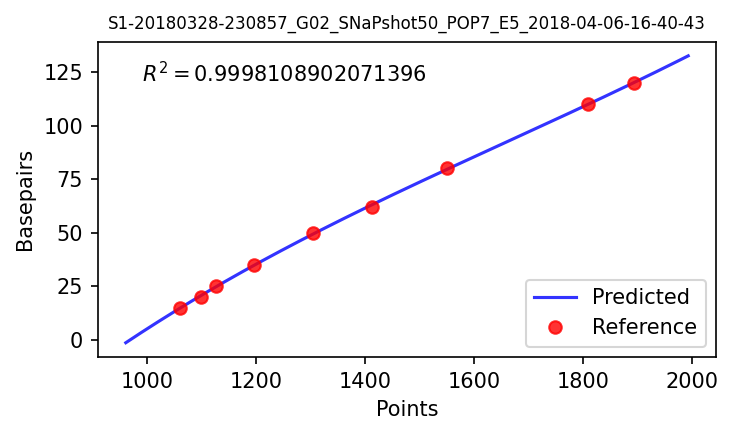

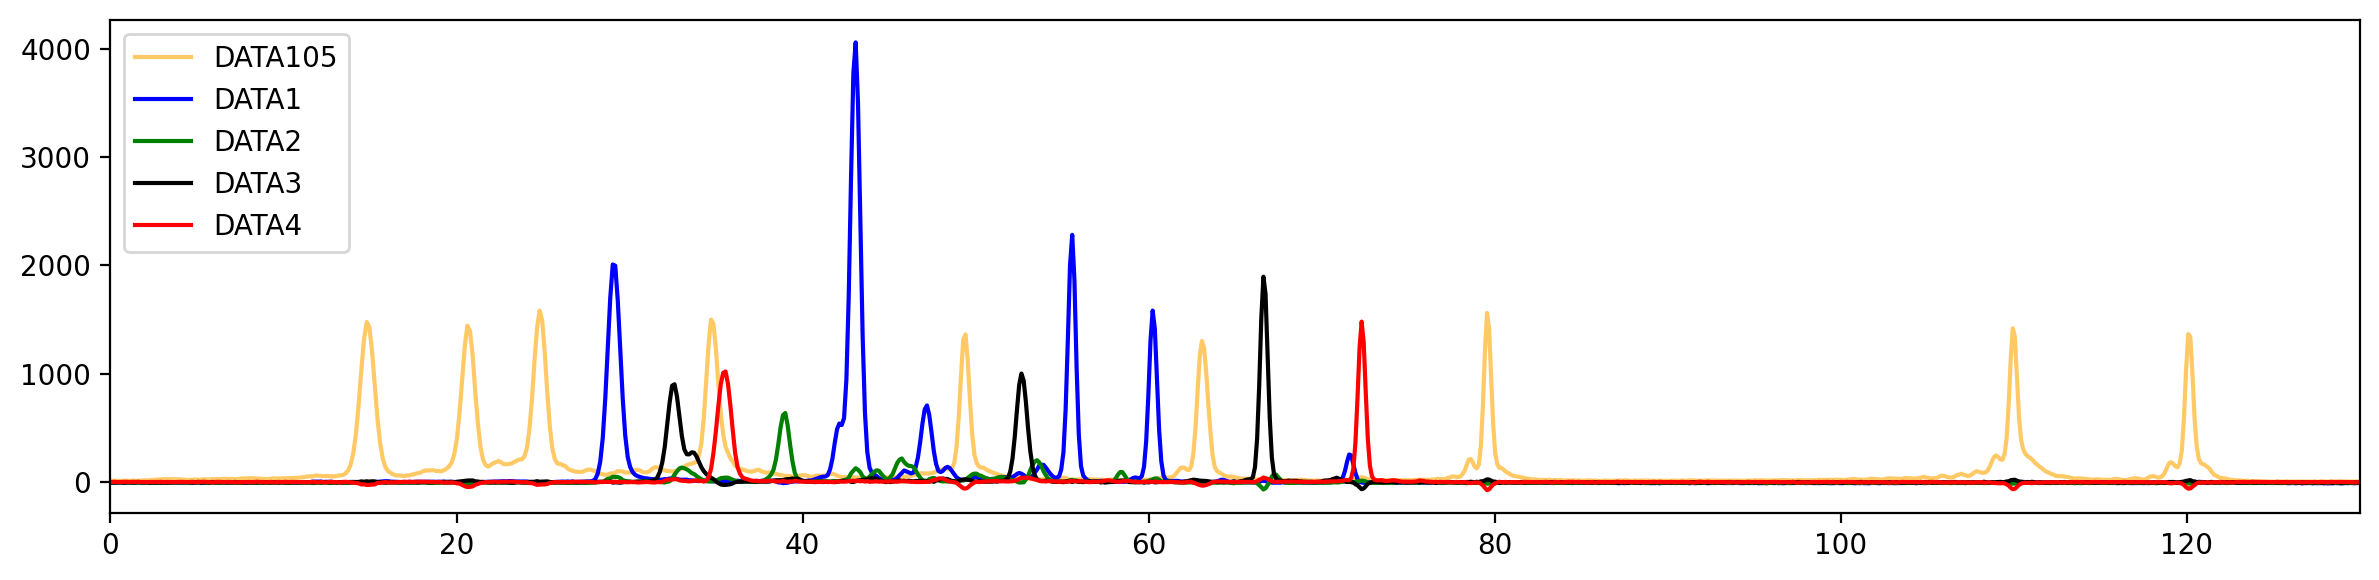

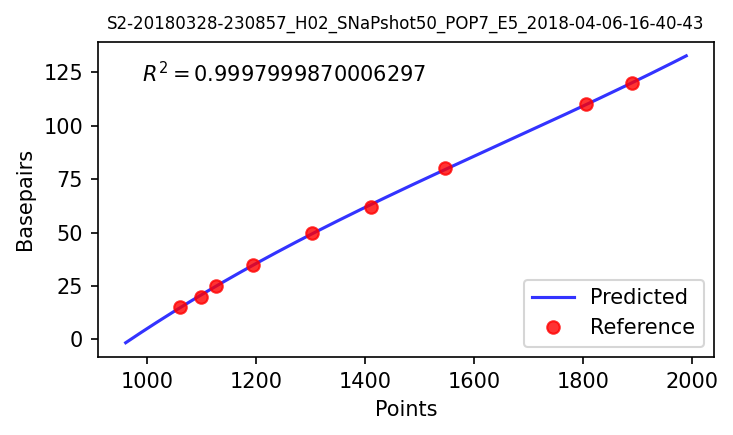

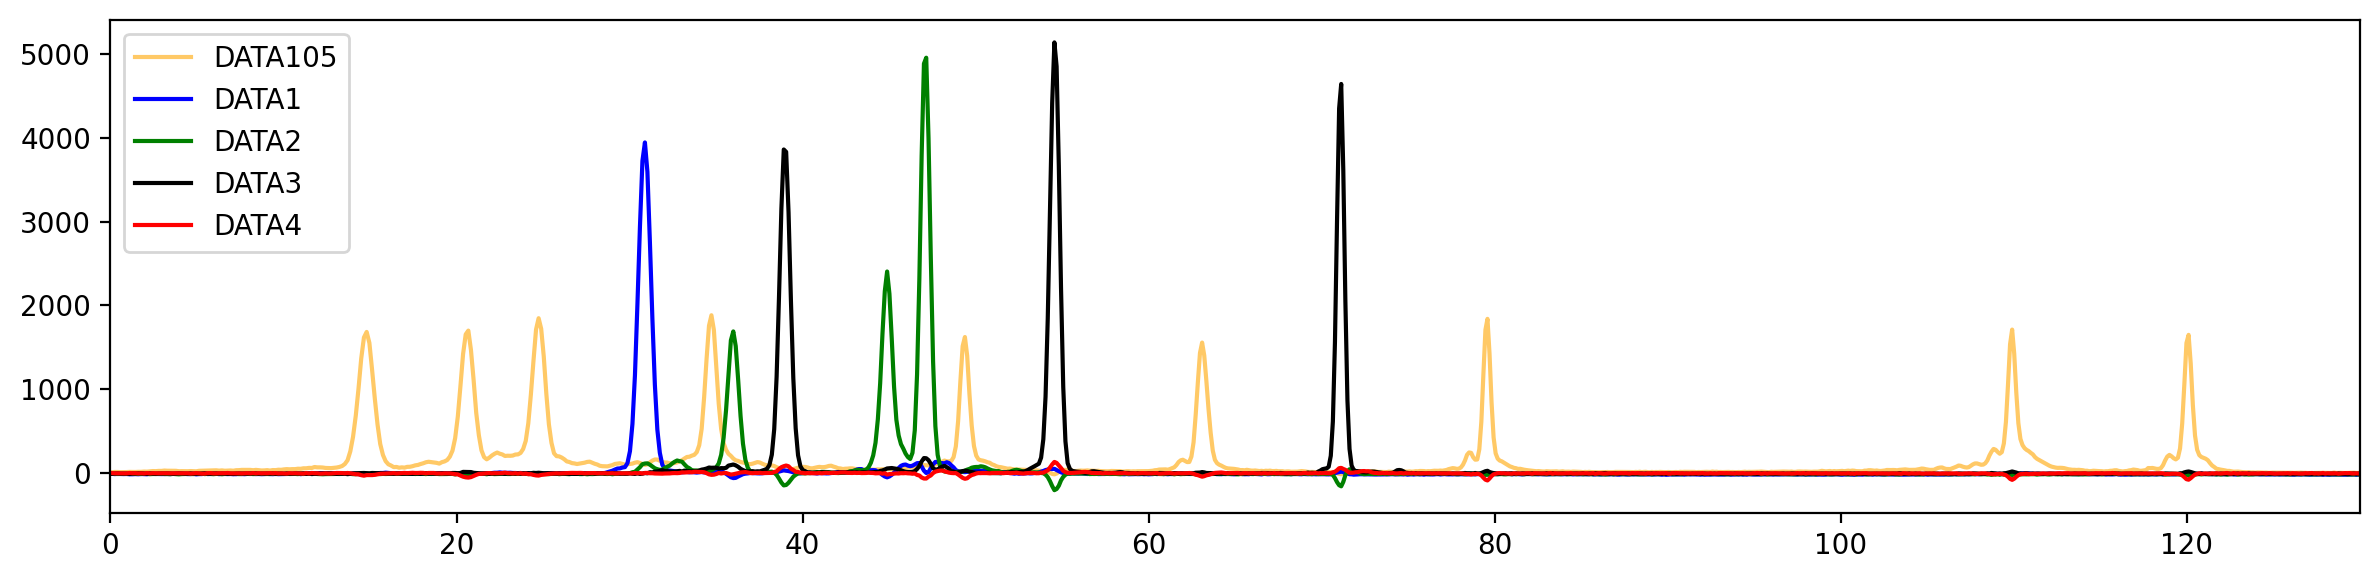

CYP2D6_001 S1 True GG wildtype
CYP2D6_002 S1 True CT heterozygous
CYP2D6_003 S1 True TT wildtype
CYP2D6_004 S1 True GG wildtype
CYP2D6_005 S1 True GG wildtype
CYP2D6_006 S1 True GG wildtype
CYP2D6_007 S1 True GG wildtype
CYP2D6_008 S1 True CC wildtype
CYP2D6_009 S1 True GG wildtype
CYP2D6_010 S1 True AA wildtype
CYP2D6_011 S2 True GG wildtype
CYP2D6_012 S2 True AA wildtype
CYP2D6_013 S2 True CC wildtype
CYP2D6_014 S2 True AA wildtype
CYP2D6_015 S2 True TT wildtype
CYP2D6_016 S2 True GG wildtype
CYP2D6_017 S2 True GG wildtype


In [17]:
fsa_files = ['./raw_data/fsa/PA180404A/S1-20180328-230857_G02_SNaPshot50_POP7_E5_2018-04-06-16-40-43.fsa',
             './raw_data/fsa/PA180404A/S2-20180328-230857_H02_SNaPshot50_POP7_E5_2018-04-06-16-40-43.fsa']
liz120 = [15, 20, 25, 35, 50, 62, 80, 110, 120]

#load origin markers
target_markers = generate_markers(peak_table)

def main(fsa_files, target_markers):
    # load reference size
    ref = Reference(liz120)

    markers = target_markers.copy()
    # print_marker(markers)
    for fsa_file in fsa_files:
        
        fsa = FSA(fsa_file)
        ref_intensity = fsa.reference_intensity
        ref_peaks, ref_peaks_height = finding_peaks(ref_intensity, min_height=800)

        # build model
        model = LeastSquared(ref_peaks, ref.size, degree=3)
        model.val_plot(fsa.name)

        # predict base from model
        pred = model.predict(range(fsa.chanel_size))

        # extract interested range 0 to 200 bp

        min_index, max_index = get_index_by_base_range(pred, ranges=(0,200))
        select_base = pred[min_index:max_index]

        # extract panel
        fsa_panel = fsa.name.split('-')[0]

        # find peak
        finding_peak_by_markers(markers,fsa, fsa_panel,select_base, (min_index, max_index))

        plot_raw_intensity(fsa, min_index, max_index, select_base, (0,130))
    
    print_marker(markers)

    return markers


s1 = main(fsa_files, target_markers)

In [27]:
pd.DataFrame(s1[0].alleles[0].__dict__)

,base,basetype,min_bin,max_bin,min_height,is_forward,is_detected,peak,peak_loc,height,status,message
0,G,wildtype,25,35,500,1,True,27,29.028728,2008.0,ok,


In [32]:
def format_call_markers(markers):
    df = pd.DataFrame()
    for marker in markers:
        for allele in marker.alleles:
            tmp = pd.DataFrame(allele.__dict__, index=[0])
            tmp['marker'] = marker.marker_name
            tmp['gene'] = marker.gene
            tmp['genotype'] = marker.genotype
            tmp['phenotype'] = marker.phenotype
            df = pd.concat([df, tmp])
    
    return df.reset_index(drop=True)
        

In [33]:
format_call_markers(s1)

,base,basetype,min_bin,max_bin,min_height,is_forward,is_detected,peak,peak_loc,height,status,message,marker,gene,genotype,phenotype
0,G,wildtype,25,35,500,1,True,27,29.028728,2008.0,ok,,CYP2D6_001,CYP2D6,GG,wildtype
1,A,mutant,27,36,500,1,False,,,,,Peak(s) could not be detected. Please check pe...,CYP2D6_001,CYP2D6,GG,wildtype
2,C,wildtype,28,38,500,1,True,32,32.598622,901.0,ok,,CYP2D6_002,CYP2D6,CT,heterozygous
3,T,mutant,31,37,500,1,True,32,35.547031,1019.0,ok,,CYP2D6_002,CYP2D6,CT,heterozygous
4,T,wildtype,37,44,500,0,True,14,39.000115,635.0,ok,,CYP2D6_003,CYP2D6,TT,wildtype
5,A,mutant,39,45,500,0,False,,,,,Peak(s) could not be detected. Please check pe...,CYP2D6_003,CYP2D6,TT,wildtype
6,G,wildtype,41,45,500,1,True,15,43.06668,4061.0,ok,,CYP2D6_004,CYP2D6,GG,wildtype
7,C,mutant,42,49,500,1,False,,,,,Peak(s) could not be detected. Please check pe...,CYP2D6_004,CYP2D6,GG,wildtype
8,G,wildtype,45,50,500,1,True,16,47.186282,705.0,ok,,CYP2D6_005,CYP2D6,GG,wildtype
9,A,mutant,47,50,500,1,False,,,,,Peak(s) could not be detected. Please check pe...,CYP2D6_005,CYP2D6,GG,wildtype


In [24]:
for marker in s1:
    print(marker.genotype)
    for allele in marker.alleles:
        print(marker.marker_name, allele.base, allele.basetype, allele.color, allele.peak_loc, allele.height)

GG
CYP2D6_001 G wildtype blue [29.02872766] [2008.]
CYP2D6_001 A mutant green  
CT
CYP2D6_002 C wildtype black [32.59862158] [901.]
CYP2D6_002 T mutant red [35.5470308] [1019.]
TT
CYP2D6_003 T wildtype green [39.00011527] [635.]
CYP2D6_003 A mutant red  
GG
CYP2D6_004 G wildtype blue [43.06668001] [4061.]
CYP2D6_004 C mutant black  
GG
CYP2D6_005 G wildtype blue [47.18628213] [705.]
CYP2D6_005 A mutant green  
GG
CYP2D6_006 G wildtype black [52.64532664] [1000.]
CYP2D6_006 A mutant red  
GG
CYP2D6_007 G wildtype blue [55.58034053] [2282.]
CYP2D6_007 T mutant red  
CC
CYP2D6_008 C wildtype blue [60.22920905] [1582.]
CYP2D6_008 T mutant green  
GG
CYP2D6_009 G wildtype black [66.63001659] [1895.]
CYP2D6_009 A mutant red  
AA
CYP2D6_010 A wildtype red [72.30482052] [1480.]
CYP2D6_010 G mutant black  
GG
CYP2D6_011 G wildtype blue [30.88708113] [3944.]
CYP2D6_011 A mutant green  
AA
CYP2D6_012 A wildtype green [35.9945669] [1689.]
CYP2D6_012 G mutant blue  
CC
CYP2D6_013 C wildtype black [

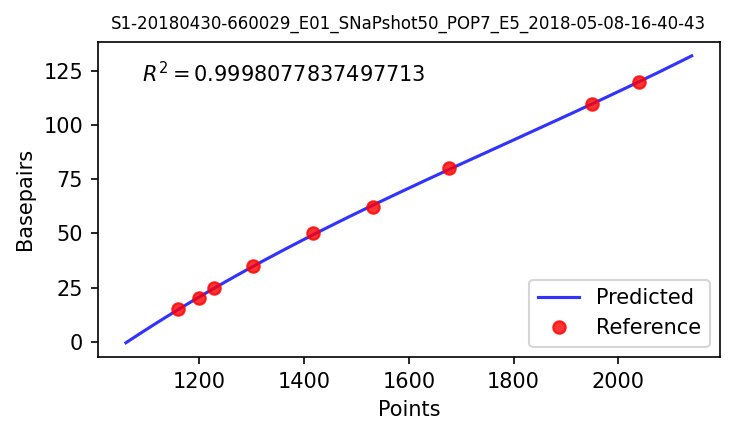

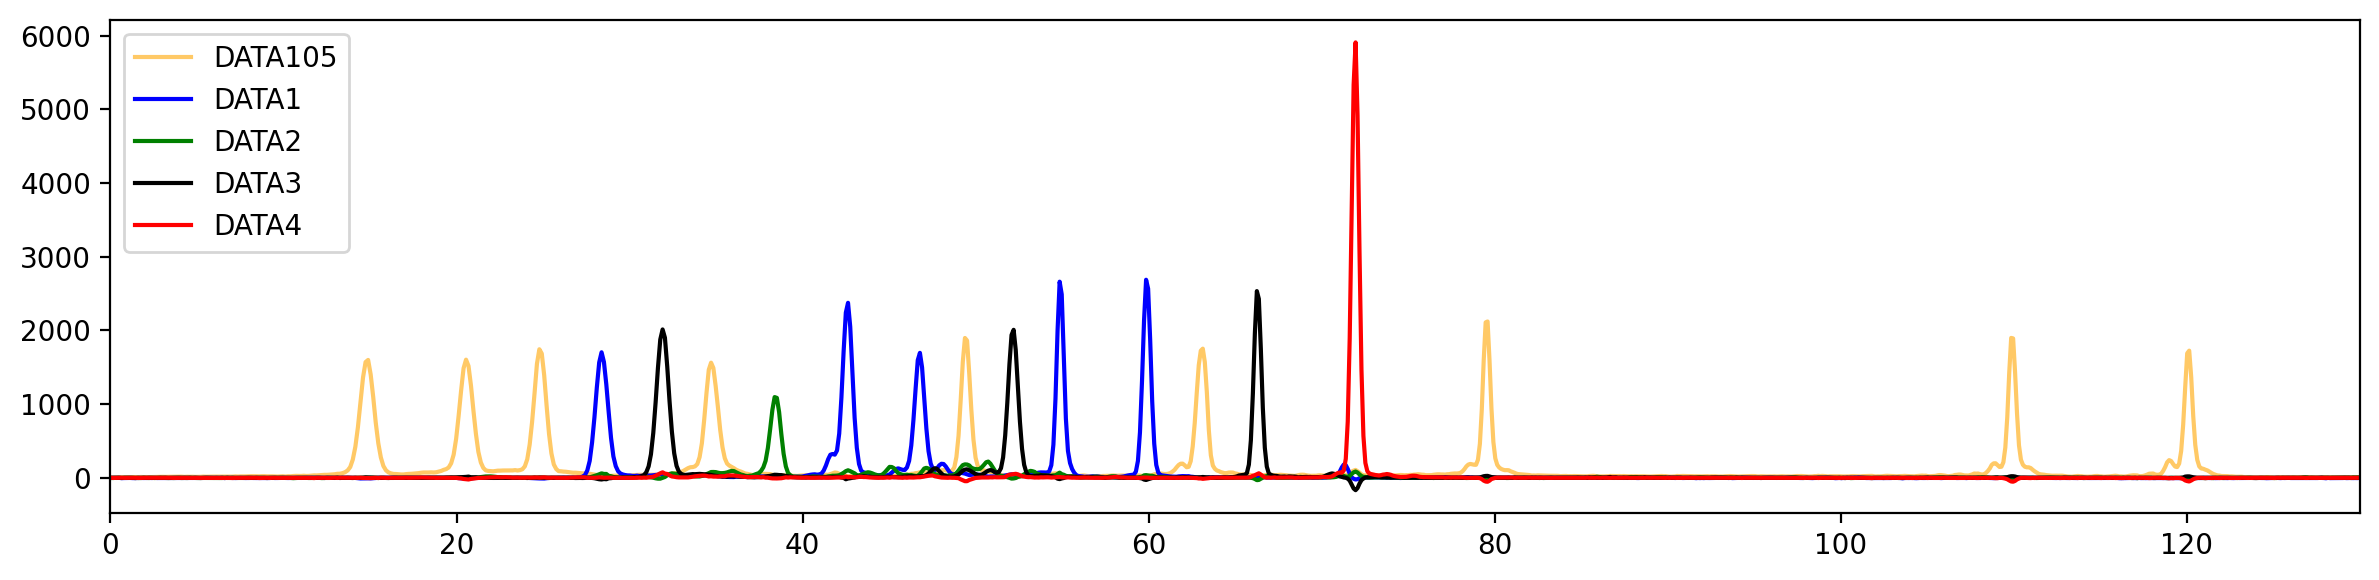

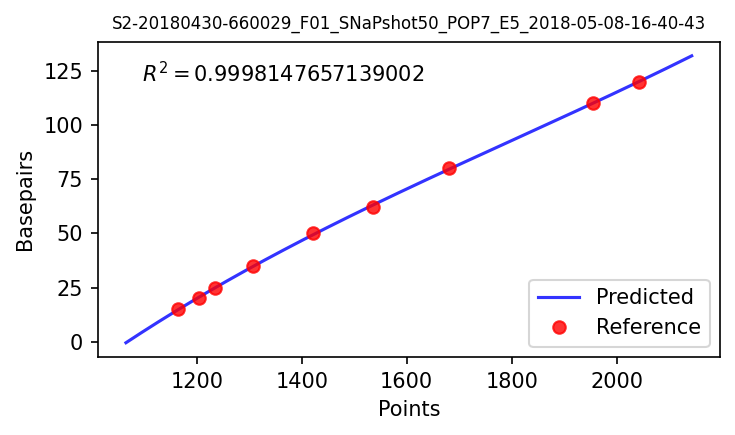

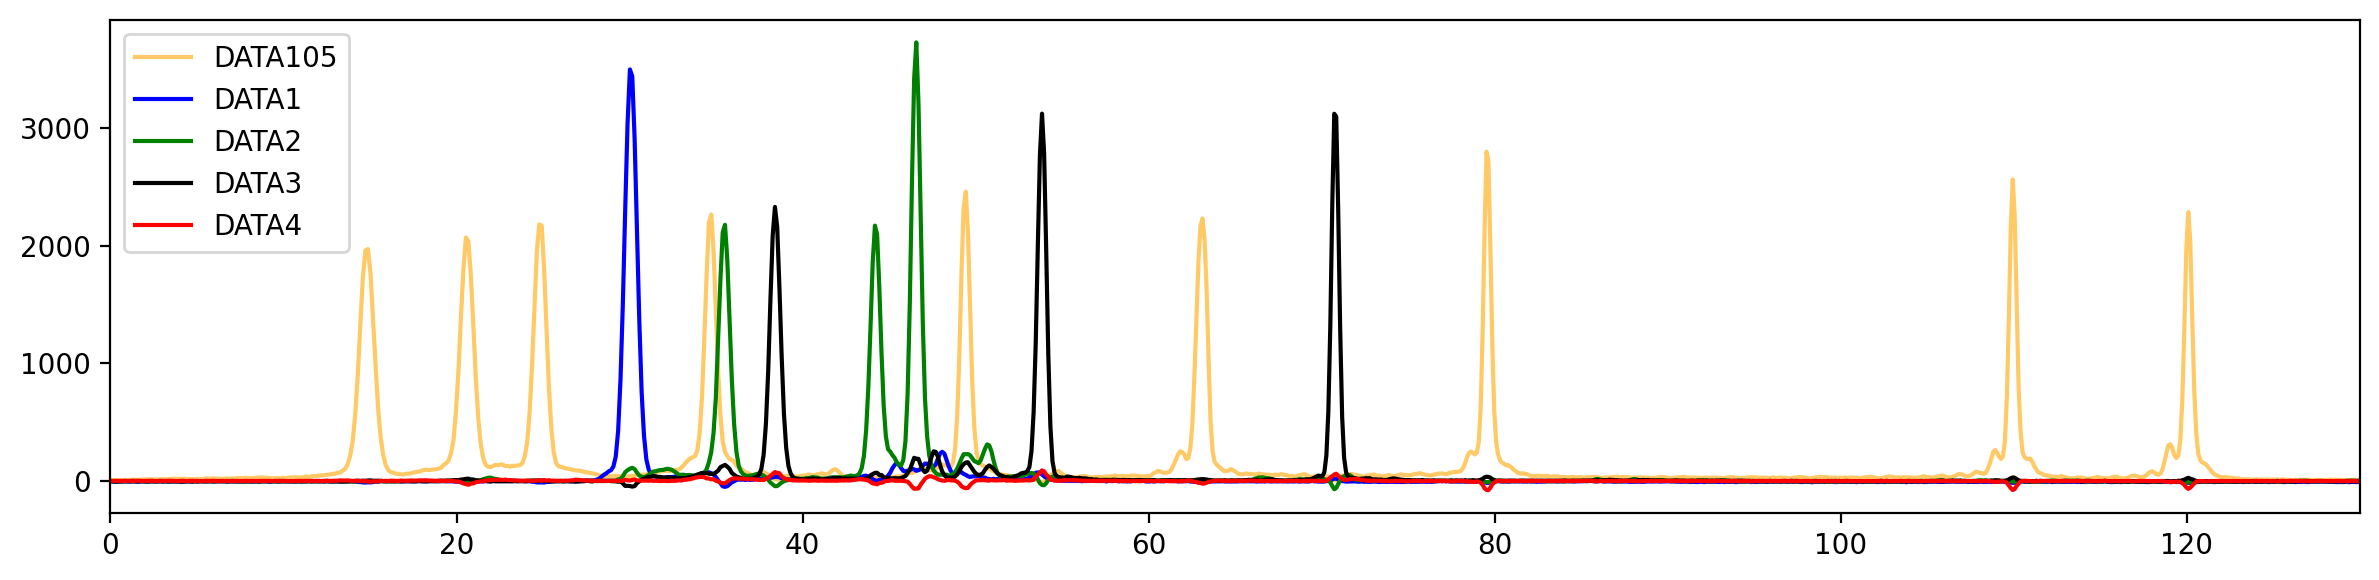

CYP2D6_001 S1 True GG wildtype
CYP2D6_002 S1 True CC wildtype
CYP2D6_003 S1 True TT wildtype
CYP2D6_004 S1 True GG wildtype
CYP2D6_005 S1 True GG wildtype
CYP2D6_006 S1 True GG wildtype
CYP2D6_007 S1 True GG wildtype
CYP2D6_008 S1 True CC wildtype
CYP2D6_009 S1 True GG wildtype
CYP2D6_010 S1 True AA wildtype
CYP2D6_011 S2 True GG wildtype
CYP2D6_012 S2 True AA wildtype
CYP2D6_013 S2 True CC wildtype
CYP2D6_014 S2 True AA wildtype
CYP2D6_015 S2 True TT wildtype
CYP2D6_016 S2 True GG wildtype
CYP2D6_017 S2 True GG wildtype


In [62]:
fsa_files = ['./raw_data/fsa/PA180503A/S1-20180430-660029_E01_SNaPshot50_POP7_E5_2018-05-08-16-40-43.fsa',
            './raw_data/fsa/PA180503A/S2-20180430-660029_F01_SNaPshot50_POP7_E5_2018-05-08-16-40-43.fsa']
main(fsa_files, target_markers)